In [66]:
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

In [2]:
# Load the dataset from the CSV file
dataset = load_dataset('csv', data_files=r'C:\Users\sami.laham\Documents\Sam\Data Analysis Training\Luke Barousse\CSV files\data_jobs.csv')

# Convert the dataset to a pandas DataFrame
df = dataset['train'].to_pandas()

# Data Cleaning: Convert the 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# Show the first few rows of the DataFrame to check the results


In [3]:
df_Spain = df[df['job_country'] == 'Spain']

In [4]:
df_skills = df_Spain.explode ('job_skills')

In [5]:
df_skills [['job_title', 'job_skills']]

,job_title,job_skills
115,Azure Big Data Engineer,scala
115,Azure Big Data Engineer,azure
124,DATA SCIENTIST,sql
124,DATA SCIENTIST,python
124,DATA SCIENTIST,r
...,...,...
785620,Business Intelligence and Data Management Tech...,r
785620,Business Intelligence and Data Management Tech...,java
785620,Business Intelligence and Data Management Tech...,cognos
785620,Business Intelligence and Data Management Tech...,tableau


In [6]:
df_skills_count = df_skills.groupby (['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst              12
            Cloud Engineer                11
            Data Analyst                  70
            Data Engineer                913
            Data Scientist               210
                                        ... 
zoom        Machine Learning Engineer      3
            Senior Data Analyst            1
            Senior Data Engineer           5
            Senior Data Scientist          9
            Software Engineer              6
Length: 1535, dtype: int64

In [10]:
df_skills_count = df_skills.groupby (['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index (name = 'skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,12
1,airflow,Cloud Engineer,11
2,airflow,Data Analyst,70
3,airflow,Data Engineer,913
4,airflow,Data Scientist,210
...,...,...,...
1530,zoom,Machine Learning Engineer,3
1531,zoom,Senior Data Analyst,1
1532,zoom,Senior Data Engineer,5
1533,zoom,Senior Data Scientist,9


In [12]:
df_skills_count.sort_values (by = 'skill_count', ascending = False, inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
987,python,Data Engineer,3827
988,python,Data Scientist,3804
1249,sql,Data Engineer,3765
1248,sql,Data Analyst,2595
1250,sql,Data Scientist,2493
...,...,...,...
407,fortran,Senior Data Analyst,1
408,fortran,Senior Data Scientist,1
409,fortran,Software Engineer,1
699,mattermost,Senior Data Analyst,1


In [36]:
df_skills_perc = pd.merge (df_skills_count, df_job_title_count, how = 'left', on = 'job_title_short')
df_skills_perc ['skill_percent'] = 100 * df_skills_perc ['skill_count']/ df_skills_perc ['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,3827,6740,56.780415
1,python,Data Scientist,3804,5598,67.952840
2,sql,Data Engineer,3765,6740,55.860534
3,sql,Data Analyst,2595,5177,50.125555
4,sql,Data Scientist,2493,5598,44.533762
...,...,...,...,...,...
1530,fortran,Senior Data Analyst,1,616,0.162338
1531,fortran,Senior Data Scientist,1,1346,0.074294
1532,fortran,Software Engineer,1,1576,0.063452
1533,mattermost,Senior Data Analyst,1,616,0.162338


In [30]:
df_job_title_count = df_Spain ['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [15]:
job_titles = df_skills_count ['job_title_short'].unique().tolist()
job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Software Engineer',
 'Business Analyst',
 'Machine Learning Engineer',
 'Senior Data Analyst',
 'Cloud Engineer']

In [18]:
job_titles = df_skills_count ['job_title_short'].unique().tolist()
job_titles = job_titles[:3]
job_titles

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [19]:
job_titles = df_skills_count ['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

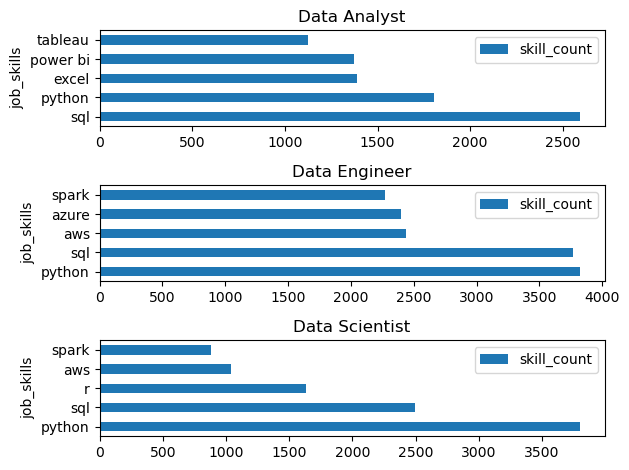

In [28]:
fix, ax = plt.subplots (len (job_titles), 1)

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_count [df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot (kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax [i], title = job_title)

plt.tight_layout()
plt.show()

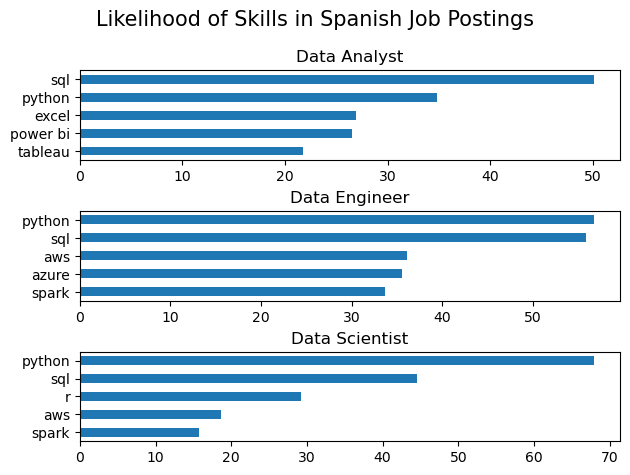

In [46]:
fig, ax = plt.subplots (len (job_titles), 1)

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_perc [df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot (kind = 'barh', x = 'job_skills', y = 'skill_percent', ax = ax [i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel ('')
    ax[i].legend ().set_visible (False)
plt.suptitle ('Likelihood of Skills in Spanish Job Postings', fontsize = 15)
plt.tight_layout(h_pad = 0.5) #fix the overlap


plt.show()

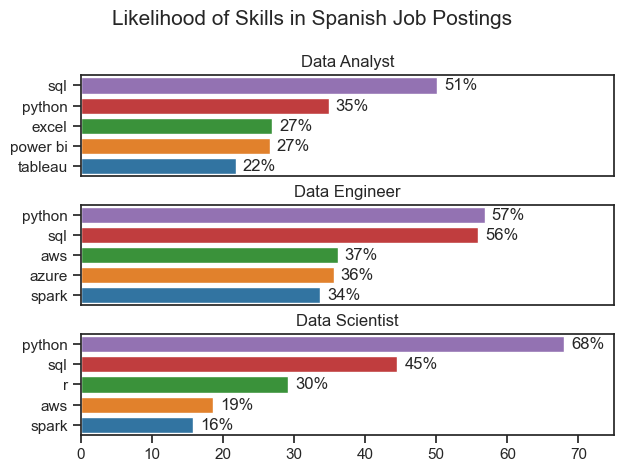

In [76]:
fig, ax = plt.subplots (len (job_titles), 1)

sns.set_theme (style= 'ticks')

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_perc [df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot (data = df_plot, x = 'skill_percent', y = 'job_skills', ax = ax [i], hue = 'skill_count', palette = 'tab10')
    ax[i].set_title (job_title)
    ax[i].set_ylabel ('')
    ax[i].set_xlabel ('')
    ax[i].get_legend ().remove()
    ax[i].set_xlim (0,75)
    
    for n, v in enumerate (df_plot ['skill_percent']):
         ax[i].text(v + 1, n, f'{math.ceil(v)}%', va='center')
    
    if i != len (job_titles) -1:
        ax [i].set_xticks([])
plt.suptitle ('Likelihood of Skills in Spanish Job Postings', fontsize = 15)
plt.tight_layout(h_pad = 0.5) #fix the overlap


plt.show()